### Content:

Step 1. Importing Libraries and Dataset

Step 2. Basic Understanding of Data

Step 3. Data Cleaning (Removing loans borrowed by joint accounts, Selecting 23 out of 74 variables for the project, Dealing with missing values)

Step 4. Data Transformation (Binary encoding loan_status, Grouping emp_length, Logging annual_inc)

Step 5. Adding more data (Federal Reserve Interest Rate, State-Wise Unemployment Rate)

Step 6. Basic Explanatory Data Analysis (Univariate Data Analysis, Bivariate Data Analysis, Correlation Analysis)


### Data frames used in this repo:

`loan`: initial dataframe

`loan_indv`: only individual borrowers

`loan_indv_cleaned`: only 23 variables, missing values dealt, data transformed

`transformed_loan`: federal interest rate and unemployment rate added

`transformed_loan2`: loan_amount and installment removed


# Step 1. Importing Libraries and Dataset

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
loan = pd.read_csv("C:/Users/Liv Tan/Downloads/loan.csv")
pd.set_option('display.max_columns', None)

c:\Users\Liv Tan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Step 2. Basic Understanding of Data

In [92]:
# Display size of dataset
print("Number of rows and columns:\n", loan.shape ,"\n|")

# Display the first few rows
print("Head:\n", loan.head())

Number of rows and columns:
 (887379, 74) 
|
Head:
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 y

In [93]:
# Display data types and non-null counts
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

# Step 3. Data Cleaning

## 3.1 Removing loans borrowed by joint accounts.

Firstly, we remove loans borrowed by joint accounts, since we are only interested in individual borrowers.

In [94]:
loan['application_type'].value_counts()

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

In [95]:
loan_indv = loan[loan['application_type']=='INDIVIDUAL']

## 3.2 Selecting 23 out of 74 variables for the project.

In [151]:
selected_variables = [
    'id','annual_inc', 'addr_state', 'delinq_2yrs', 'dti', 'emp_title', 
    'emp_length', 'funded_amnt', 'grade','home_ownership', 'inq_last_6mths', 
    'installment', 'int_rate', 'issue_d', 'loan_amnt','loan_status', 
    'mths_since_last_delinq', 'pub_rec', 'purpose', 'sub_grade', 'term', 
    'title','total_acc', 'acc_now_delinq'
]

# Update dataframe to be left with selected variables 
loan_indv_cleaned = loan_indv[selected_variables]
loan_indv_cleaned

,id,annual_inc,addr_state,delinq_2yrs,dti,emp_title,emp_length,funded_amnt,grade,home_ownership,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,acc_now_delinq
0,1077501,24000.0,AZ,0.0,27.65,NaN,10+ years,5000.0,B,RENT,1.0,162.87,10.65,Dec-2011,5000.0,Fully Paid,NaN,0.0,credit_card,B2,36 months,Computer,9.0,0.0
1,1077430,30000.0,GA,0.0,1.00,Ryder,< 1 year,2500.0,C,RENT,5.0,59.83,15.27,Dec-2011,2500.0,Charged Off,NaN,0.0,car,C4,60 months,bike,4.0,0.0
2,1077175,12252.0,IL,0.0,8.72,NaN,10+ years,2400.0,C,RENT,2.0,84.33,15.96,Dec-2011,2400.0,Fully Paid,NaN,0.0,small_business,C5,36 months,real estate business,10.0,0.0
3,1076863,49200.0,CA,0.0,20.00,AIR RESOURCES BOARD,10+ years,10000.0,C,RENT,1.0,339.31,13.49,Dec-2011,10000.0,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,0.0
4,1075358,80000.0,OR,0.0,17.94,University Medical Group,1 year,3000.0,B,RENT,0.0,67.79,12.69,Dec-2011,3000.0,Current,38.0,0.0,other,B5,60 months,Personal,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,31000.0,CA,0.0,28.69,Office Assistant,8 years,10000.0,B,RENT,0.0,332.10,11.99,Jan-2015,10000.0,Current,NaN,1.0,debt_consolidation,B5,36 months,Debt consolidation,15.0,0.0
887375,36441262,79000.0,NJ,0.0,3.90,Director of Maintenance,10+ years,24000.0,B,MORTGAGE,1.0,797.03,11.99,Jan-2015,24000.0,Current,26.0,0.0,home_improvement,B5,36 months,Home improvement,23.0,0.0
887376,36271333,35000.0,TN,0.0,30.90,Radiologist Technologist,5 years,13000.0,D,RENT,0.0,316.07,15.99,Jan-2015,13000.0,Current,NaN,1.0,debt_consolidation,D2,60 months,Debt consolidation,22.0,0.0
887377,36490806,64400.0,MA,1.0,27.19,Painter,1 year,12000.0,E,RENT,2.0,317.86,19.99,Jan-2015,12000.0,Current,22.0,0.0,debt_consolidation,E3,60 months,Debt consolidation,20.0,0.0


## 3.3 Dealing with missing values.

In [97]:
loan_indv_cleaned.isna().sum()

id                             0
annual_inc                     4
addr_state                     0
delinq_2yrs                   29
dti                            0
emp_title                  51401
emp_length                 44764
funded_amnt                    0
grade                          0
home_ownership                 0
inq_last_6mths                29
installment                    0
int_rate                       0
issue_d                        0
loan_amnt                      0
loan_status                    0
mths_since_last_delinq    454080
pub_rec                       29
purpose                        0
sub_grade                      0
term                           0
title                        143
total_acc                     29
acc_now_delinq                29
dtype: int64

Notice how there are equally 29 missing values in `delinq_2yrs`, `inq_last_6mnths`,`pub_rec`, `total_acc` and `acc_now_delinq`. Let's find out if they belong to the same row.

In [98]:
# Drop rows with missing values in `delinq_2yrs`
loan_indv_cleaned= loan_indv_cleaned.dropna(subset=['delinq_2yrs'])
loan_indv_cleaned.isna().sum()

id                             0
annual_inc                     0
addr_state                     0
delinq_2yrs                    0
dti                            0
emp_title                  51389
emp_length                 44764
funded_amnt                    0
grade                          0
home_ownership                 0
inq_last_6mths                 0
installment                    0
int_rate                       0
issue_d                        0
loan_amnt                      0
loan_status                    0
mths_since_last_delinq    454051
pub_rec                        0
purpose                        0
sub_grade                      0
term                           0
title                        143
total_acc                      0
acc_now_delinq                 0
dtype: int64

It appears that they are possibly the same 29 rows that are missing several values, hence we dropped those 29 rows. 

Next, let's fill in 0 for missing values in `mths_since_last delinq`, since missing values in the column likely means that there is no delinquency.

In [99]:
# For missing values in `mths_since_last delinq`, insert 0 
loan_indv_cleaned['mths_since_last_delinq'] = loan_indv_cleaned['mths_since_last_delinq'].fillna(0)

<ipython-input-99-bc87d4d66ffd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_indv_cleaned['mths_since_last_delinq'] = loan_indv_cleaned['mths_since_last_delinq'].fillna(0)


Lastly, let's investigate the missing values in `emp_length`.

In [100]:
loan_indv_cleaned['emp_length'].value_counts()

10+ years    291400
2 years       78832
< 1 year      70541
3 years       69992
1 year        57061
5 years       55686
4 years       52496
7 years       44576
8 years       43930
6 years       42927
9 years       34634
Name: emp_length, dtype: int64

In [101]:
# drop missing values in 'emp_length'
loan_indv_cleaned = loan_indv_cleaned.dropna(subset=['emp_length'])

Since missing values in `emp_title` and `title` won't affect our results greatly, we will not deal with them. Until now, we are done with dealing with missing values.

In [102]:
loan_indv_cleaned.isna().sum()

id                           0
annual_inc                   0
addr_state                   0
delinq_2yrs                  0
dti                          0
emp_title                 7014
emp_length                   0
funded_amnt                  0
grade                        0
home_ownership               0
inq_last_6mths               0
installment                  0
int_rate                     0
issue_d                      0
loan_amnt                    0
loan_status                  0
mths_since_last_delinq       0
pub_rec                      0
purpose                      0
sub_grade                    0
term                         0
title                      134
total_acc                    0
acc_now_delinq               0
dtype: int64

# Step 4. Data Tranformation

In this step, we will transform some of our data to make it more relevant for our further analysis. Let's start with our variable of interest, `loan_status`.

## 4.1 Binary encoding loan_status

In [103]:
# Finding out unique categories of 'loan_status'
loan_indv_cleaned['loan_status'].value_counts()

Current                                                568301
Fully Paid                                             200350
Charged Off                                             42723
Late (31-120 days)                                      10870
Issued                                                   7769
In Grace Period                                          6013
Late (16-30 days)                                        2215
Does not meet the credit policy. Status:Fully Paid       1943
Default                                                  1148
Does not meet the credit policy. Status:Charged Off       743
Name: loan_status, dtype: int64

Instead of having so many different categories, we want to classify them into 0 and 1.  Since we are interested in finding out the likelihood of default, we will denote 0 as fully paid and 1 as default.

In [104]:
mapping = {
    'Fully Paid': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Charged Off': 1,
    'Late (31-120 days)': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Charged Off': 1
}

# Map the loan status to new values
loan_indv_cleaned['loan_status_grouped'] = loan_indv_cleaned['loan_status'].map(mapping)

# Filter to keep only the relevant statuses (1 and 0)
loan_indv_cleaned = loan_indv_cleaned.dropna(subset=['loan_status_grouped'])

# Display updated column
print("loan_status:/n")
loan_indv_cleaned['loan_status'].value_counts()
print("loan_status_grouped:/n")
loan_indv_cleaned['loan_status_grouped'].value_counts()


loan_status:/n
loan_status_grouped:/n


0.0    202293
1.0     55484
Name: loan_status_grouped, dtype: int64

## 4.2 Grouping emp_length

For `emp_length`, we'd like to group them into ""0-1 years," "2-5 years,", "6-10 years" and ">10 years". 

In [105]:
# Finding out unique categories of 'emp_length'
loan_indv_cleaned['emp_length'].value_counts()

10+ years    81247
2 years      25049
< 1 year     22442
3 years      21682
5 years      18992
1 year       18073
4 years      17140
6 years      15569
7 years      14849
8 years      12582
9 years      10152
Name: emp_length, dtype: int64

In [106]:
mapping_emp_length = {
    '< 1 year': "0-1 years",
    '1 year': "0-1 years",
    '2 years': "2-5 years",
    '3 years': "2-5 years",
    '4 years': "2-5 years",
    '5 years': "2-5 years",
    '6 years': "6-9 years",
    '7 years': "6-9 years",
    '8 years': "6-9 years",
    '9 years': "6-9 years",
    '10+ years': "10+ years"
}

# Apply the mapping function to the emp_length column
loan_indv_cleaned['emp_length'] = loan_indv_cleaned['emp_length'].map(mapping_emp_length)

# Display updated column
loan_indv_cleaned['emp_length'].value_counts()

2-5 years    82863
10+ years    81247
6-9 years    53152
0-1 years    40515
Name: emp_length, dtype: int64

## 4.3 Logging annual_inc

Let's plot the histogram of our numerical variables to observe their distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

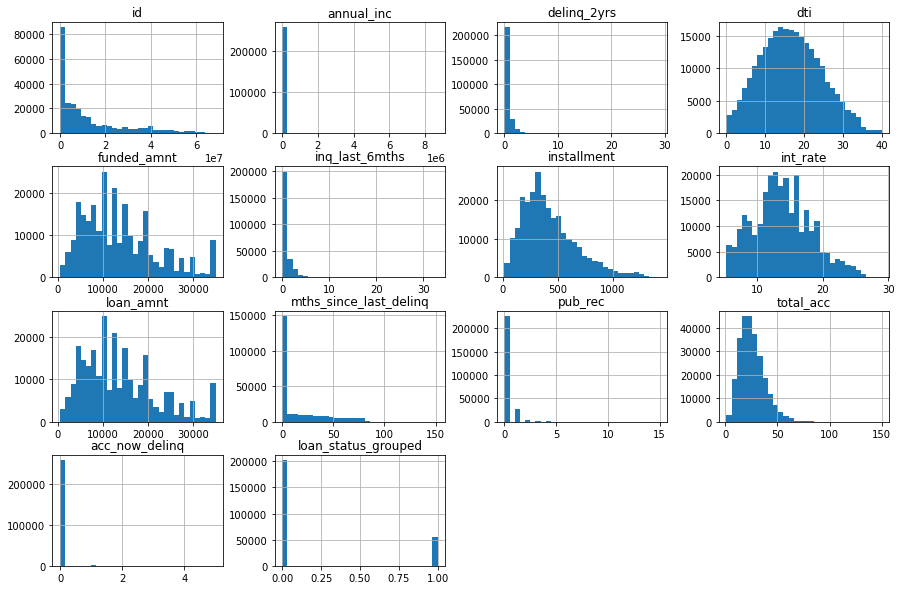

In [107]:
# Plot histogram for annual_inc
loan_indv_cleaned.hist(bins=30, figsize=(15,10))
plt.show

`annual_inc` is an important feature, and it seems to be right skewed, let's try to log it and test it's normality using Shapiro-Wilk test.

In [108]:
# import necessary libraries
from scipy.stats import shapiro

In [109]:
# knwoing annual income is right skewed, we prepare logged annual income for comparison of normality 
loan_indv_cleaned["log_annual_inc"] = np.log(loan_indv_cleaned['annual_inc'])

annual_inc = loan_indv_cleaned['annual_inc']
log_annual_inc = loan_indv_cleaned["log_annual_inc"]

# Shapiro-Wilk Test
shapiro_annual_inc = shapiro(annual_inc)
shapiro_log_annual_inc = shapiro(log_annual_inc)
print(f'Shapiro-Wilk Test for annual_inc: Statistic={shapiro_annual_inc.statistic}, p-value={shapiro_annual_inc.pvalue}')
print(f'Shapiro-Wilk Test for log_annual_inc: Statistic={shapiro_log_annual_inc.statistic}, p-value={shapiro_log_annual_inc.pvalue}')

Shapiro-Wilk Test for annual_inc: Statistic=0.4732050895690918, p-value=0.0
Shapiro-Wilk Test for log_annual_inc: Statistic=0.992024838924408, p-value=0.0


c:\Users\Liv Tan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


A statistic value closer to 1 indicates that the sample data is more closely aligned with a normal distribution. Hence, `log_annual_inc` is more closely aligned to a normal distribution than `annual_inc`. p-value is ignored here, although the data is considered normally distributed if p-value > 0.05, however it is more ideal for us to refer when sample size n <50. With very large samples, even small deviations from normality can result in a significant test.


# Step 5. Adding more data

In this step, we try to add macroeconomic variables like fed rate and unemployment rate, for a more complete analysis.

In [132]:
# Duplicating dataframe
transformed_loan = loan_indv_cleaned

# Display latest dataframe
print(transformed_loan)

              id  annual_inc addr_state  delinq_2yrs    dti  \
0        1077501     24000.0         AZ          0.0  27.65   
1        1077430     30000.0         GA          0.0   1.00   
2        1077175     12252.0         IL          0.0   8.72   
3        1076863     49200.0         CA          0.0  20.00   
5        1075269     36000.0         AZ          0.0  11.20   
...          ...         ...        ...          ...    ...   
887347  37041208     63078.0         PA          0.0  31.70   
887351  36743377     48000.0         CO          0.0  36.93   
887364  36231718     54000.0         FL          1.0  13.22   
887366  36241316     27000.0         FL          0.0  18.58   
887369  36421485     50000.0         CA          0.0  12.63   

                   emp_title emp_length  funded_amnt grade home_ownership  \
0                        NaN  10+ years       5000.0     B           RENT   
1                      Ryder  0-1 years       2500.0     C           RENT   
2           

## 5.1 Adding Federal Reserve Interest Rate

In [133]:
# Load the Federal Reserve interest rate data 
fedrate = pd.read_csv("../.Database/fedrate.csv") # https://www.kaggle.com/datasets/federalreserve/interest-rates
fedrate.head

<bound method NDFrame.head of      Year  Month  Day  Federal Funds Target Rate  Federal Funds Upper Target  \
0    1954      7    1                        NaN                         NaN   
1    1954      8    1                        NaN                         NaN   
2    1954      9    1                        NaN                         NaN   
3    1954     10    1                        NaN                         NaN   
4    1954     11    1                        NaN                         NaN   
..    ...    ...  ...                        ...                         ...   
899  2016     12   14                        NaN                        0.75   
900  2017      1    1                        NaN                        0.75   
901  2017      2    1                        NaN                        0.75   
902  2017      3    1                        NaN                        0.75   
903  2017      3   16                        NaN                        1.00   

     Fede

In [134]:
# Drop missing values
fedrate = fedrate.dropna(subset=['Effective Federal Funds Rate'])

# Select important columns
selected_columns = ['Year','Month','Effective Federal Funds Rate']
fedrate = fedrate[selected_columns]

# Renaming multiple columns
fedrate.rename(columns={
    'Year': 'issue_y',
    'Month': 'issue_m'
}, inplace=True)

# Display updated dataframe
fedrate.head()

,issue_y,issue_m,Effective Federal Funds Rate
0,1954,7,0.80
1,1954,8,1.22
2,1954,9,1.06
3,1954,10,0.85
4,1954,11,0.83


In [135]:
# Merging fedrate into transformed_loan

# Convert the 'issue_d' column to datetime format, assuming the format is 'Month-Year', and align the date to the beginning of the month
transformed_loan['issue_d'] = pd.to_datetime(transformed_loan['issue_d'], format='%b-%Y') + pd.offsets.MonthBegin(0)

# Extract the year from the 'issue_d' 
transformed_loan['issue_y'] = transformed_loan['issue_d'].dt.year

# Extract the month from the 'issue_d' 
transformed_loan['issue_m'] = transformed_loan['issue_d'].dt.month

# Merging the fed rate data into cleaned_loan
transformed_loan = transformed_loan.merge(fedrate, on=['issue_y', 'issue_m'], how='left')
transformed_loan.head()

,id,annual_inc,addr_state,delinq_2yrs,dti,emp_title,emp_length,funded_amnt,grade,home_ownership,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,acc_now_delinq,loan_status_grouped,log_annual_inc,issue_y,issue_m,Effective Federal Funds Rate
0,1077501,24000.0,AZ,0.0,27.65,NaN,10+ years,5000.0,B,RENT,1.0,162.87,10.65,2011-12-01,5000.0,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,0.0,0.0,10.085809,2011,12,0.07
1,1077430,30000.0,GA,0.0,1.00,Ryder,0-1 years,2500.0,C,RENT,5.0,59.83,15.27,2011-12-01,2500.0,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,0.0,1.0,10.308953,2011,12,0.07
2,1077175,12252.0,IL,0.0,8.72,NaN,10+ years,2400.0,C,RENT,2.0,84.33,15.96,2011-12-01,2400.0,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,0.0,0.0,9.413444,2011,12,0.07
3,1076863,49200.0,CA,0.0,20.00,AIR RESOURCES BOARD,10+ years,10000.0,C,RENT,1.0,339.31,13.49,2011-12-01,10000.0,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,0.0,0.0,10.803649,2011,12,0.07
4,1075269,36000.0,AZ,0.0,11.20,Veolia Transportaton,2-5 years,5000.0,A,RENT,3.0,156.46,7.90,2011-12-01,5000.0,Fully Paid,0.0,0.0,wedding,A4,36 months,My wedding loan I promise to pay back,12.0,0.0,0.0,10.491274,2011,12,0.07


## 5.2 Adding State-Wise Unemployment Rate

In [136]:
# Load the state wise unemployment rate data 
unemp = pd.read_csv("../.Database/us_state_unemployment_rate.csv") # https://www.bls.gov/
unemp.head()

,state_code,year,month,value
0,AL,2015,12,6.1
1,AL,2015,11,6.1
2,AL,2015,10,6.1
3,AL,2015,9,6.1
4,AL,2015,8,6.2


In [137]:
# Renaming columns in unemp to align with transformed_loan
unemp.rename(columns={
    'state_code': 'addr_state',
    'year': 'issue_y',
    'month': 'issue_m',
    'value': 'state_unemployment' 
}, inplace=True)

unemp.head()

print("len(unemp['addr_state'].value_counts():", len(unemp['addr_state'].value_counts()))

len(unemp['addr_state'].value_counts(): 51


In [138]:
# Merge with transformed_loan
transformed_loan = transformed_loan.merge(unemp, on=['issue_y', 'issue_m','addr_state'], how='left')
transformed_loan

,id,annual_inc,addr_state,delinq_2yrs,dti,emp_title,emp_length,funded_amnt,grade,home_ownership,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,acc_now_delinq,loan_status_grouped,log_annual_inc,issue_y,issue_m,Effective Federal Funds Rate,state_unemployment
0,1077501,24000.0,AZ,0.0,27.65,NaN,10+ years,5000.0,B,RENT,1.0,162.87,10.65,2011-12-01,5000.0,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,0.0,0.0,10.085809,2011,12,0.07,8.8
1,1077430,30000.0,GA,0.0,1.00,Ryder,0-1 years,2500.0,C,RENT,5.0,59.83,15.27,2011-12-01,2500.0,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,0.0,1.0,10.308953,2011,12,0.07,9.6
2,1077175,12252.0,IL,0.0,8.72,NaN,10+ years,2400.0,C,RENT,2.0,84.33,15.96,2011-12-01,2400.0,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,0.0,0.0,9.413444,2011,12,0.07,9.5
3,1076863,49200.0,CA,0.0,20.00,AIR RESOURCES BOARD,10+ years,10000.0,C,RENT,1.0,339.31,13.49,2011-12-01,10000.0,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,0.0,0.0,10.803649,2011,12,0.07,11.3
4,1075269,36000.0,AZ,0.0,11.20,Veolia Transportaton,2-5 years,5000.0,A,RENT,3.0,156.46,7.90,2011-12-01,5000.0,Fully Paid,0.0,0.0,wedding,A4,36 months,My wedding loan I promise to pay back,12.0,0.0,0.0,10.491274,2011,12,0.07,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257772,37041208,63078.0,PA,0.0,31.70,customer service,10+ years,17000.0,D,MORTGAGE,0.0,413.32,15.99,2015-01-01,17000.0,Fully Paid,0.0,0.0,debt_consolidation,D2,60 months,Debt consolidation,28.0,0.0,0.0,11.052127,2015,1,0.11,5.5
257773,36743377,48000.0,CO,0.0,36.93,supervisor,10+ years,4200.0,D,MORTGAGE,0.0,147.64,15.99,2015-01-01,4200.0,Charged Off,38.0,0.0,medical,D2,36 months,Medical expenses,45.0,0.0,1.0,10.778956,2015,1,0.11,4.1
257774,36231718,54000.0,FL,1.0,13.22,Coordinator of RSVP,0-1 years,10775.0,A,RENT,0.0,327.95,6.03,2015-01-01,10775.0,Fully Paid,16.0,0.0,debt_consolidation,A1,36 months,Debt consolidation,21.0,0.0,0.0,10.896739,2015,1,0.11,5.9
257775,36241316,27000.0,FL,0.0,18.58,Painter,2-5 years,6225.0,D,RENT,1.0,220.37,16.49,2015-01-01,6225.0,Fully Paid,0.0,0.0,debt_consolidation,D3,36 months,Debt consolidation,4.0,0.0,0.0,10.203592,2015,1,0.11,5.9


# Step 6. Basic Explanatory Data Analysis

## 6.1 Univariate Data Analysis

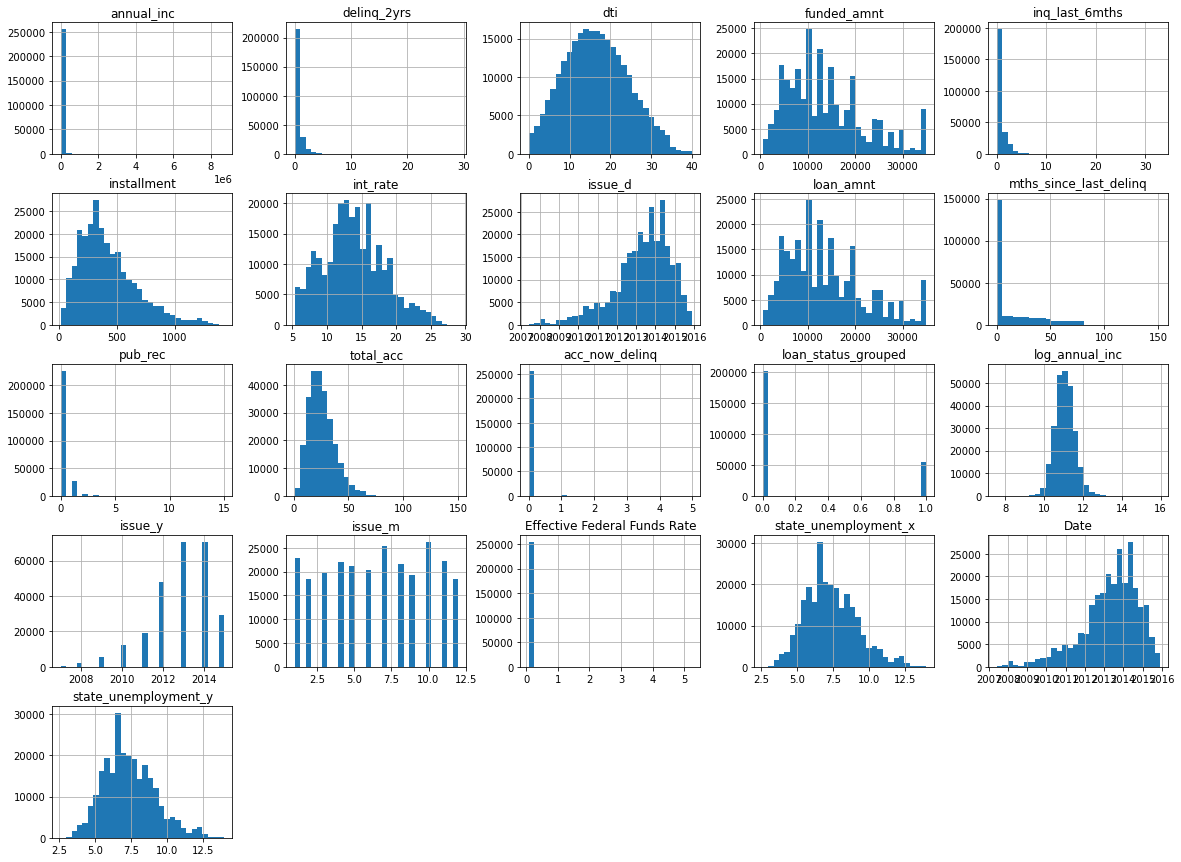

In [130]:
# numerical_features = cleaned_loan.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Histogram for numerical columns
transformed_loan.hist(bins=30, figsize=(20, 15))
plt.show()

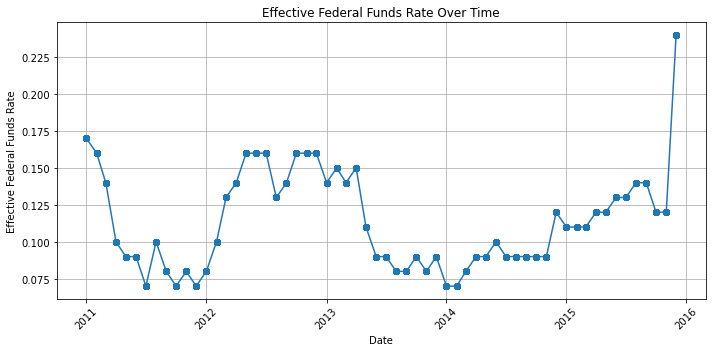

In [119]:
# Plot Effective Federal Funds Rate Over Time

# Combine year and month into a datetime column
transformed_loan['Date'] = pd.to_datetime(transformed_loan['issue_y'].astype(str) + '-' + transformed_loan['issue_m'].astype(str) + '-01')

# Sort the DataFrame by Date
transformed_loan_plot = transformed_loan.sort_values(by='Date')
transformed_loan_plot = transformed_loan_plot[transformed_loan_plot['issue_y'] >= 2011]

# Re-plot
plt.figure(figsize=(10, 5))
plt.plot(transformed_loan_plot['Date'], transformed_loan_plot['Effective Federal Funds Rate'], marker='o')
plt.title('Effective Federal Funds Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Effective Federal Funds Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-120-fc322b446b8b>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


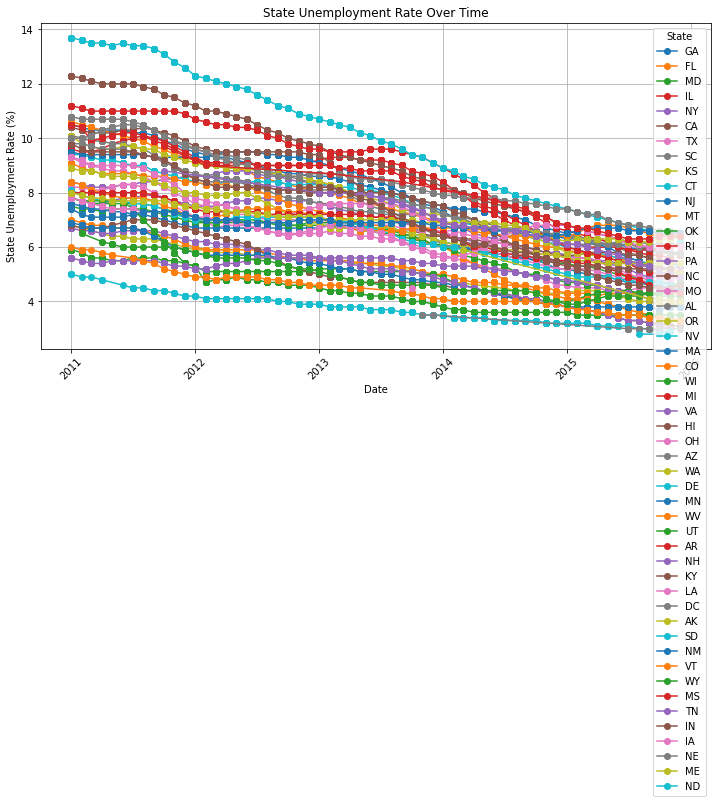

In [120]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot each state separately
for state in transformed_loan_plot['addr_state'].unique():
    state_data = transformed_loan_plot[transformed_loan_plot['addr_state'] == state]
    plt.plot(state_data['Date'], state_data['state_unemployment'], marker='o', label=state)

plt.title('State Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('State Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='State')
plt.tight_layout()
plt.show()

In [122]:
'''# Calculate the average unemployment rate for each state and find max and min
state_avg = transformed_loan_plot.drop(columns=['Date']).mean()
max_state = state_avg.idxmax()
min_state = state_avg.idxmin()

# Plotting
plt.figure(figsize=(12, 6))

# Plot each state
for state in transformed_loan_plot.columns[1:]:
    if state == max_state:
        plt.plot(transformed_loan_plot['Date'], transformed_loan_plot[state], color='red', linewidth=2, label=f'Max: {state}')
    elif state == min_state:
        plt.plot(transformed_loan_plot['Date'], transformed_loan_plot[state], color='blue', linewidth=2, label=f'Min: {state}')
    else:
        plt.plot(transformed_loan_plot['Date'], transformed_loan_plot[state], color='grey', linewidth=1)

# Remove gridlines
plt.grid(False)

# Add title and labels
plt.title('State Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('State Unemployment Rate (%)')

# Add legend
plt.legend()

plt.tight_layout()
plt.show()
'''

"# Calculate the average unemployment rate for each state and find max and min\nstate_avg = transformed_loan_plot.drop(columns=['Date']).mean()\nmax_state = state_avg.idxmax()\nmin_state = state_avg.idxmin()\n\n# Plotting\nplt.figure(figsize=(12, 6))\n\n# Plot each state\nfor state in transformed_loan_plot.columns[1:]:\n    if state == max_state:\n        plt.plot(transformed_loan_plot['Date'], transformed_loan_plot[state], color='red', linewidth=2, label=f'Max: {state}')\n    elif state == min_state:\n        plt.plot(transformed_loan_plot['Date'], transformed_loan_plot[state], color='blue', linewidth=2, label=f'Min: {state}')\n    else:\n        plt.plot(transformed_loan_plot['Date'], transformed_loan_plot[state], color='grey', linewidth=1)\n\n# Remove gridlines\nplt.grid(False)\n\n# Add title and labels\nplt.title('State Unemployment Rate Over Time')\nplt.xlabel('Date')\nplt.ylabel('State Unemployment Rate (%)')\n\n# Add legend\nplt.legend()\n\nplt.tight_layout()\nplt.show()\n"

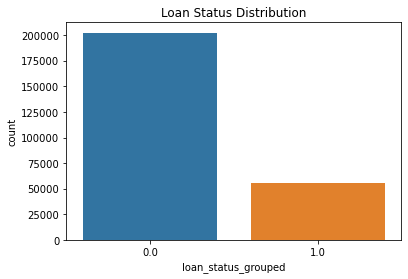

In [123]:
# loan_status_grouped is categorical variable, where 1 means default, 0 means fully paid or expected to fully paid.

# Count plot for the interested variable 'loan_status_grouped'
sns.countplot(x='loan_status_grouped', data=transformed_loan)
plt.title('Loan Status Distribution')

plt.show()

## 6.2 Bivariate Data Analysis

### 6.2.1 Annual income by loan_status_grouped

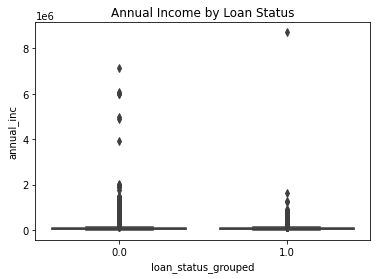

In [124]:
# Box plot for "annual_inc" against "loan_status_grouped"
sns.boxplot(x='loan_status_grouped', y='annual_inc', data=transformed_loan)
plt.title('Annual Income by Loan Status')
plt.show()

0.0 is the fully paid group while 1.0 is the default group.

The interquartile range (IQR) is narrow for all categories, showing that most borrowers have a similar range of incomes across different loan statuses. 

Fully paid group has more outliers, suggesting higher income might contribute to the ability to repay loans.

The median annual income appears similar, does this mean that annual income is not a strong candidate variable to predict loan status? Let's see how close they are.


In [125]:
# Calculate the median of annual income of the groups
median_income_by_status = transformed_loan.groupby('loan_status_grouped')['annual_inc'].median()

# Display the median incomes
print(median_income_by_status)

loan_status_grouped
0.0    65000.00
1.0    58811.74
Name: annual_inc, dtype: float64


The higher the median annual income, the more likely the borrowers are going to fully pay the debt. Hence, annual income remains a strong candidate variable in predicting loan status. Next, we will investigate loan status by grade.

## 6.3 Correlation Analysis

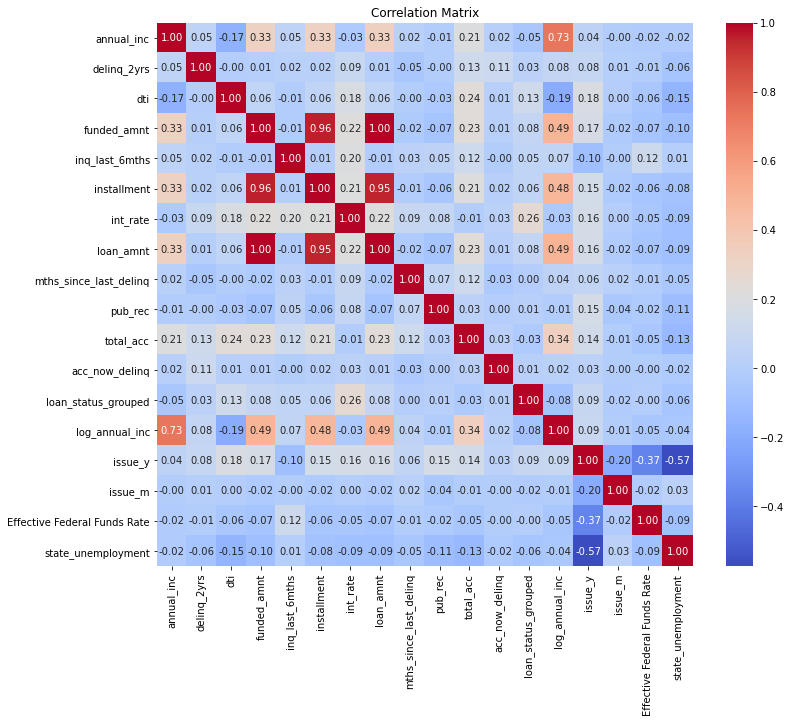

In [126]:
# Correlation matrix
corr = transformed_loan.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Upon further investigation, `loan_amount`, `funded_amount` and `installment` seems to be the same. Hence, we will remove `funded_amuont` and `installment` from our dataframe.

In [139]:
print(transformed_loan.columns)

Index(['id', 'annual_inc', 'addr_state', 'delinq_2yrs', 'dti', 'emp_title',
       'emp_length', 'funded_amnt', 'grade', 'home_ownership',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt',
       'loan_status', 'mths_since_last_delinq', 'pub_rec', 'purpose',
       'sub_grade', 'term', 'title', 'total_acc', 'acc_now_delinq',
       'loan_status_grouped', 'log_annual_inc', 'issue_y', 'issue_m',
       'Effective Federal Funds Rate', 'state_unemployment'],
      dtype='object')


In [144]:
selected_variables = [
    'id','annual_inc', 'addr_state', 'delinq_2yrs', 'dti', 'emp_title', 
    'emp_length', 'grade','home_ownership', 'inq_last_6mths', 'int_rate', 
    'issue_d', 'loan_amnt','loan_status', 'mths_since_last_delinq', 'pub_rec', 
    'purpose', 'sub_grade', 'term', 'title','total_acc', 
    'acc_now_delinq','loan_status_grouped', 'log_annual_inc', 'issue_y', 'issue_m',
    'Effective Federal Funds Rate', 'state_unemployment'
]

# Update dataframe to be left with selected variables 
transformed_loan2 = transformed_loan[selected_variables]
transformed_loan2

,id,annual_inc,addr_state,delinq_2yrs,dti,emp_title,emp_length,grade,home_ownership,inq_last_6mths,int_rate,issue_d,loan_amnt,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,acc_now_delinq,loan_status_grouped,log_annual_inc,issue_y,issue_m,Effective Federal Funds Rate,state_unemployment
0,1077501,24000.0,AZ,0.0,27.65,NaN,10+ years,B,RENT,1.0,10.65,2011-12-01,5000.0,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,0.0,0.0,10.085809,2011,12,0.07,8.8
1,1077430,30000.0,GA,0.0,1.00,Ryder,0-1 years,C,RENT,5.0,15.27,2011-12-01,2500.0,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,0.0,1.0,10.308953,2011,12,0.07,9.6
2,1077175,12252.0,IL,0.0,8.72,NaN,10+ years,C,RENT,2.0,15.96,2011-12-01,2400.0,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,0.0,0.0,9.413444,2011,12,0.07,9.5
3,1076863,49200.0,CA,0.0,20.00,AIR RESOURCES BOARD,10+ years,C,RENT,1.0,13.49,2011-12-01,10000.0,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,0.0,0.0,10.803649,2011,12,0.07,11.3
4,1075269,36000.0,AZ,0.0,11.20,Veolia Transportaton,2-5 years,A,RENT,3.0,7.90,2011-12-01,5000.0,Fully Paid,0.0,0.0,wedding,A4,36 months,My wedding loan I promise to pay back,12.0,0.0,0.0,10.491274,2011,12,0.07,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257772,37041208,63078.0,PA,0.0,31.70,customer service,10+ years,D,MORTGAGE,0.0,15.99,2015-01-01,17000.0,Fully Paid,0.0,0.0,debt_consolidation,D2,60 months,Debt consolidation,28.0,0.0,0.0,11.052127,2015,1,0.11,5.5
257773,36743377,48000.0,CO,0.0,36.93,supervisor,10+ years,D,MORTGAGE,0.0,15.99,2015-01-01,4200.0,Charged Off,38.0,0.0,medical,D2,36 months,Medical expenses,45.0,0.0,1.0,10.778956,2015,1,0.11,4.1
257774,36231718,54000.0,FL,1.0,13.22,Coordinator of RSVP,0-1 years,A,RENT,0.0,6.03,2015-01-01,10775.0,Fully Paid,16.0,0.0,debt_consolidation,A1,36 months,Debt consolidation,21.0,0.0,0.0,10.896739,2015,1,0.11,5.9
257775,36241316,27000.0,FL,0.0,18.58,Painter,2-5 years,D,RENT,1.0,16.49,2015-01-01,6225.0,Fully Paid,0.0,0.0,debt_consolidation,D3,36 months,Debt consolidation,4.0,0.0,0.0,10.203592,2015,1,0.11,5.9


In [145]:
transformed_loan2.set_index('id', inplace=True)

In [148]:

transformed_loan2

,annual_inc,addr_state,delinq_2yrs,dti,emp_title,emp_length,grade,home_ownership,inq_last_6mths,int_rate,issue_d,loan_amnt,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,acc_now_delinq,loan_status_grouped,log_annual_inc,issue_y,issue_m,Effective Federal Funds Rate,state_unemployment
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,24000.0,AZ,0.0,27.65,NaN,10+ years,B,RENT,1.0,10.65,2011-12-01,5000.0,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,0.0,0.0,10.085809,2011,12,0.07,8.8
1077430,30000.0,GA,0.0,1.00,Ryder,0-1 years,C,RENT,5.0,15.27,2011-12-01,2500.0,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,0.0,1.0,10.308953,2011,12,0.07,9.6
1077175,12252.0,IL,0.0,8.72,NaN,10+ years,C,RENT,2.0,15.96,2011-12-01,2400.0,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,0.0,0.0,9.413444,2011,12,0.07,9.5
1076863,49200.0,CA,0.0,20.00,AIR RESOURCES BOARD,10+ years,C,RENT,1.0,13.49,2011-12-01,10000.0,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,0.0,0.0,10.803649,2011,12,0.07,11.3
1075269,36000.0,AZ,0.0,11.20,Veolia Transportaton,2-5 years,A,RENT,3.0,7.90,2011-12-01,5000.0,Fully Paid,0.0,0.0,wedding,A4,36 months,My wedding loan I promise to pay back,12.0,0.0,0.0,10.491274,2011,12,0.07,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37041208,63078.0,PA,0.0,31.70,customer service,10+ years,D,MORTGAGE,0.0,15.99,2015-01-01,17000.0,Fully Paid,0.0,0.0,debt_consolidation,D2,60 months,Debt consolidation,28.0,0.0,0.0,11.052127,2015,1,0.11,5.5
36743377,48000.0,CO,0.0,36.93,supervisor,10+ years,D,MORTGAGE,0.0,15.99,2015-01-01,4200.0,Charged Off,38.0,0.0,medical,D2,36 months,Medical expenses,45.0,0.0,1.0,10.778956,2015,1,0.11,4.1
36231718,54000.0,FL,1.0,13.22,Coordinator of RSVP,0-1 years,A,RENT,0.0,6.03,2015-01-01,10775.0,Fully Paid,16.0,0.0,debt_consolidation,A1,36 months,Debt consolidation,21.0,0.0,0.0,10.896739,2015,1,0.11,5.9


In [150]:
transformed_loan2.to_csv("../.Database/merged_cleaned_loan.csv", index=True)